In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from soccerplots.radar_chart import Radar

In [2]:
df=pd.read_csv('defensive_detail_epl.csv')

df.rename(columns=df.iloc[0], inplace = True)
df.drop([0], inplace = True)

df=df[df['Pos'].str.contains('MF')]

df.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', '90s', 'Tkl',
       'TklW', 'Def 3rd Tackles', 'Mid 3rd Tackles', 'Att 3rd Tackels',
       'Tkl Vs Dribbles', 'Att Vs Dribbles', 'Tkl% Vs Dribbles',
       'Past Vs Dribble', 'Press Pressures', 'Succ Pressures', '% Pressures',
       'Def 3rd Pressures', 'Mid 3rd Pressures', 'Att 3rd Pressures', 'Blocks',
       'Sh Blocks', 'ShSv Blocks', 'Pass Blocks', 'Int', 'Tkl+Int', 'Clr',
       'Err', 'Matches'],
      dtype='object')

In [3]:
df=df.drop(['Rk','Nation', 'Age', 'Born','Matches'],axis=1)

df['Player']=df['Player'].str.split('\\',expand=True)[0]

df['90s']=pd.to_numeric(df['90s'],downcast='float')
df=df[df['90s']>10].reset_index()

In [5]:
df

,index,Player,Pos,Squad,90s,Tkl,TklW,Def 3rd Tackles,Mid 3rd Tackles,Att 3rd Tackels,...,Mid 3rd Pressures,Att 3rd Pressures,Blocks,Sh Blocks,ShSv Blocks,Pass Blocks,Int,Tkl+Int,Clr,Err
0,12,Thiago Alcántara,MF,Liverpool,16.600000,50,32,20,22,8,...,181,79,23,0,0,23,27,77,15,0
1,18,Allan,MF,Everton,18.799999,62,43,31,29,2,...,256,28,32,11,0,21,20,82,25,0
2,20,Miguel Almirón,MFFW,Newcastle Utd,24.100000,47,28,21,23,3,...,186,113,35,5,2,30,24,71,23,1
3,24,Ethan Ampadu,DFMF,Sheffield Utd,23.200001,62,36,31,26,5,...,138,41,48,20,0,28,39,101,120,2
4,30,Stuart Armstrong,MF,Southampton,27.900000,67,40,25,30,12,...,200,101,30,1,0,29,29,96,19,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,504,Willian,FWMF,Arsenal,15.600000,16,6,8,7,1,...,77,72,22,0,0,22,12,28,4,0
133,510,Granit Xhaka,MFDF,Arsenal,26.900000,56,35,23,20,13,...,153,74,32,7,0,25,25,81,54,1
134,513,Okay Yokuşlu,MF,West Brom,11.900000,41,28,21,18,2,...,112,21,19,1,0,18,31,72,30,0
135,515,Andre-Frank Zambo Anguissa,MF,Fulham,26.600000,82,50,27,42,13,...,252,104,44,7,0,37,47,129,33,1


In [6]:
list = df.columns;

#list = ['Tkl', 'Succ Pressures',       'Blocks', 'Int', 'Clr']

list=list[4:]
list

Index(['90s', 'Tkl', 'TklW', 'Def 3rd Tackles', 'Mid 3rd Tackles',
       'Att 3rd Tackels', 'Tkl Vs Dribbles', 'Att Vs Dribbles',
       'Tkl% Vs Dribbles', 'Past Vs Dribble', 'Press Pressures',
       'Succ Pressures', '% Pressures', 'Def 3rd Pressures',
       'Mid 3rd Pressures', 'Att 3rd Pressures', 'Blocks', 'Sh Blocks',
       'ShSv Blocks', 'Pass Blocks', 'Int', 'Tkl+Int', 'Clr', 'Err'],
      dtype='object')

In [7]:
for x in list:
    df[x]=pd.to_numeric(df[x],downcast='float')
    df[x]=df[x]/df['90s']

In [8]:
df['Err']=pd.to_numeric(df['Err'],downcast='float')

In [9]:
df1=df[(df['Player']=='Rodri')|(df['Player']=='Fred')].reset_index()

In [18]:
df1


,level_0,index,Player,Pos,Squad,90s,Tkl,TklW,Def 3rd Tackles,Mid 3rd Tackles,...,Mid 3rd Pressures,Att 3rd Pressures,Blocks,Sh Blocks,ShSv Blocks,Pass Blocks,Int,Tkl+Int,Clr,Err
0,39,159,Fred,MF,Manchester Utd,1.0,82.0,53.0,31.0,41.0,...,289.0,102.0,60.0,8.0,0.0,52.0,47.0,129.0,31.0,0.0
1,108,399,Rodri,MF,Manchester City,1.0,77.0,57.0,31.0,33.0,...,243.0,64.0,37.0,9.0,0.0,28.0,37.0,114.0,61.0,1.0


In [19]:
params=df1.columns
params=params[6:]

In [20]:
ranges=[]
a_values =[]
b_values =[]
x_values =[]
y_values =[]

for x in params:
    a=min(df1[x])
    a=a*.75
    x_values.append(df[x][0])
    y_values.append(df[x][1])
    b=max(df1[x])
    b=b*1.25
    
    ranges.append((a,b))

a_values= df1.iloc[0].values.tolist()
b_values= df1.iloc[1].values.tolist()


In [21]:
a_values=a_values[6:]
b_values=b_values[6:]
x_values
y_values

[62.0,
 43.0,
 31.0,
 29.0,
 2.0,
 21.0,
 72.0,
 29.2,
 51.0,
 515.0,
 157.0,
 30.5,
 231.0,
 256.0,
 28.0,
 32.0,
 11.0,
 0.0,
 21.0,
 20.0,
 82.0,
 25.0,
 0.0]

In [109]:
values= [a_values,b_values]
values
ranges

[(2.0551600456237793, 4.116466045379639),
 (4.483985781669617, 9.236947894096375),
 (0.9875444769859314, 3.012048304080963),
 (0.9875444769859314, 2.359437793493271),
 (0.9337349832057953, 2.713523209095001),
 (0.0, 1.25)]

In [103]:
title = dict(
    title_name = 'Fred',
    title_color ='red',
    subtitle_name= 'Man Utd',
    subtitle_color= 'red',
    title_name_2 = 'Rodri',
    title_color_2 ='blue',
    subtitle_name_2 = 'Man City',
    subtitle_color_2 = 'blue',
    title_fontsize= 15,
    sbutitle_fontsize=15
)

endnote ='test  from FBREF'

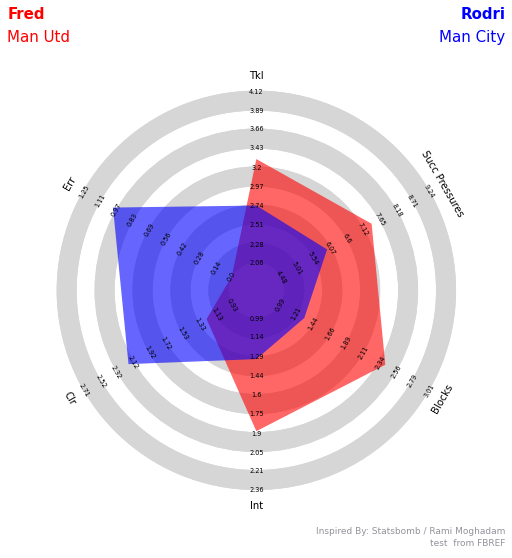

In [110]:
radar= Radar()

fig, ax = radar.plot_radar(ranges= ranges, params=params,values=values,
                           radar_color=['red','blue'],alpha=[.75,.6],title=title,
                           endnote=endnote,compare=True)
    